<a href="https://colab.research.google.com/github/bryaanabraham/Wandering_Guardian/blob/main/Sample%20Curve%20Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd

df = pd.read_csv("go_track_trackspoints.csv")
df.dropna(how='all', inplace=True)
df = df[df['track_id'] == 1]
df.head(10)

,id,latitude,longitude,track_id,time
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53
5,6,-10.938544,-37.062839,1,2014-09-13 07:24:59
6,7,-10.938346,-37.062588,1,2014-09-13 07:25:04
7,8,-10.938448,-37.062000,1,2014-09-13 07:25:10
8,9,-10.938666,-37.061499,1,2014-09-13 07:25:15
9,10,-10.938986,-37.060819,1,2014-09-13 07:25:21


In [34]:
import math

def gps_to_cartesian(floatlatitude, longitude):
    # Radius of the Earth in meters
    R = 6371000

    # Convert latitude and longitude from degrees to radians
    lat_rad = math.radians(floatlatitude)
    lon_rad = math.radians(longitude)

    # Convert latitude and longitude to Cartesian coordinates
    x = R * math.cos(lat_rad) * math.cos(lon_rad)
    y = R * math.cos(lat_rad) * math.sin(lon_rad)

    return x, y

# Apply the gps_to_cartesian function to each row of the DataFrame
df['x'], df['y'] = zip(*df.apply(lambda row: gps_to_cartesian(row['latitude'], row['longitude']), axis=1))

# Display the modified DataFrame
df.head(100)


,id,latitude,longitude,track_id,time,x,y
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32,4.991524e+06,-3.769960e+06
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37,4.991524e+06,-3.769960e+06
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42,4.991523e+06,-3.769962e+06
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47,4.991519e+06,-3.769970e+06
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53,4.991521e+06,-3.769977e+06
...,...,...,...,...,...,...,...
85,86,-10.947085,-37.045783,1,2014-09-13 07:32:25,4.992509e+06,-3.768384e+06
86,87,-10.947085,-37.045783,1,2014-09-13 07:32:31,4.992509e+06,-3.768384e+06
87,88,-10.947085,-37.045783,1,2014-09-13 07:32:37,4.992509e+06,-3.768384e+06
88,89,-10.947085,-37.045783,1,2014-09-13 07:32:42,4.992509e+06,-3.768384e+06


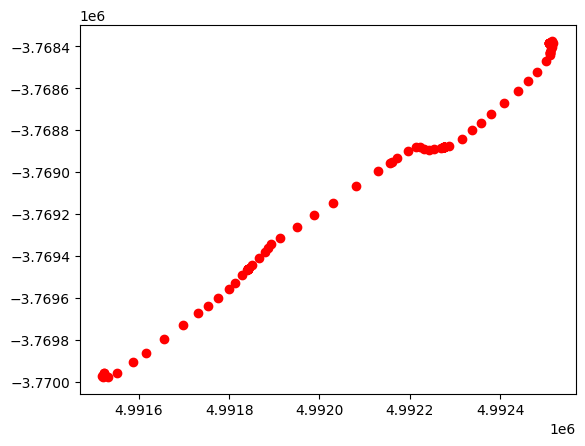

In [35]:
import matplotlib.pyplot as plt
plt.scatter(df['x'], df['y'], label='GPS Data', color='red')

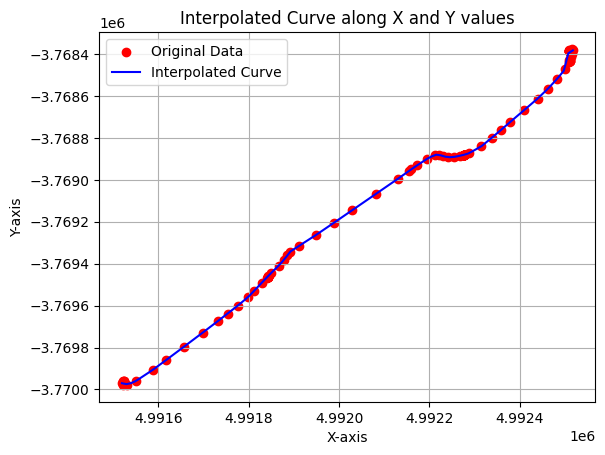

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Assuming df is your DataFrame containing columns: 'id', 'x', 'y'
# Sort the DataFrame based on the 'id' column
df_sorted = df.sort_values(by='id')

# Extract x and y coordinates
x_coords = df_sorted['x']
y_coords = df_sorted['y']

# Perform linear interpolation
interp_func = interp1d(x_coords, y_coords, kind='linear')

# Generate a set of interpolated points along the curve
interpolated_x = np.linspace(min(x_coords), max(x_coords), num=100)
interpolated_y = interp_func(interpolated_x)

# Plot the original data points
plt.scatter(x_coords, y_coords, label='Original Data', color='red')

# Plot the interpolated curve
plt.plot(interpolated_x, interpolated_y, label='Interpolated Curve', color='blue')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Interpolated Curve along X and Y values')
plt.legend()
plt.grid(True)
plt.show()


In [44]:
import numpy as np
from scipy.interpolate import interp1d

def interpolate_curve(x_values, y_values):
    # Perform linear interpolation
    interp_func = interp1d(x_values, y_values, kind='linear', bounds_error=False, fill_value='extrapolate')

    # Define a function that returns y=f(x)
    def interpolated_function(x):
        return interp_func(x)

    return interpolated_function

# Assuming df is your DataFrame containing columns: 'id', 'x', 'y'
# Sort the DataFrame based on the 'id' column
df_sorted = df.sort_values(by='id')

# Extract x and y coordinates
x_coords = df_sorted['x']
y_coords = df_sorted['y']

# Create the interpolation function
curve_function = interpolate_curve(x_coords, y_coords)

# Example usage:
x_value = 15.2509e+06	  # Example x value for interpolation
try:
    y_value = curve_function(x_value)  # Interpolated y value for the given x value
    print(f"For x = {x_value}, y = {y_value}")
except ValueError as e:
    print(e)


For x = 15250900.0, y = -39192352.964510374
